# Purpose
The purpose of this notebook is to clean the `immo_data202208_v2.csv` file, save it and generate an automated exploratory analysis report.

In [1]:
# Import modules
import pandas as pd
from utils.helper_v2 import ImmoHelper
import sweetviz as sv

In [2]:
# turn off warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
helper = ImmoHelper()
df = helper.process_data(return_gde=False)

                                             |          | [  0%]   00:00 -> (? left)


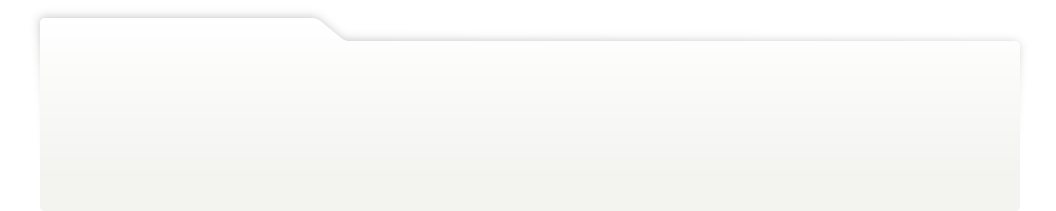
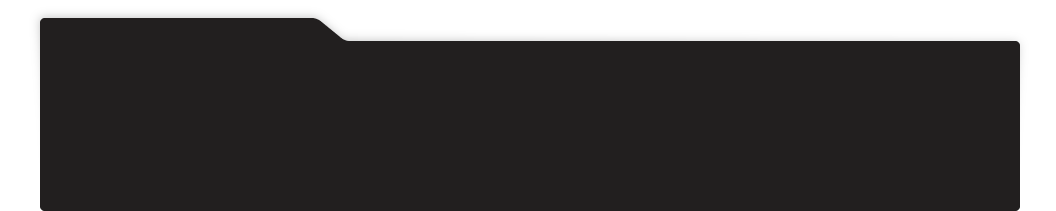
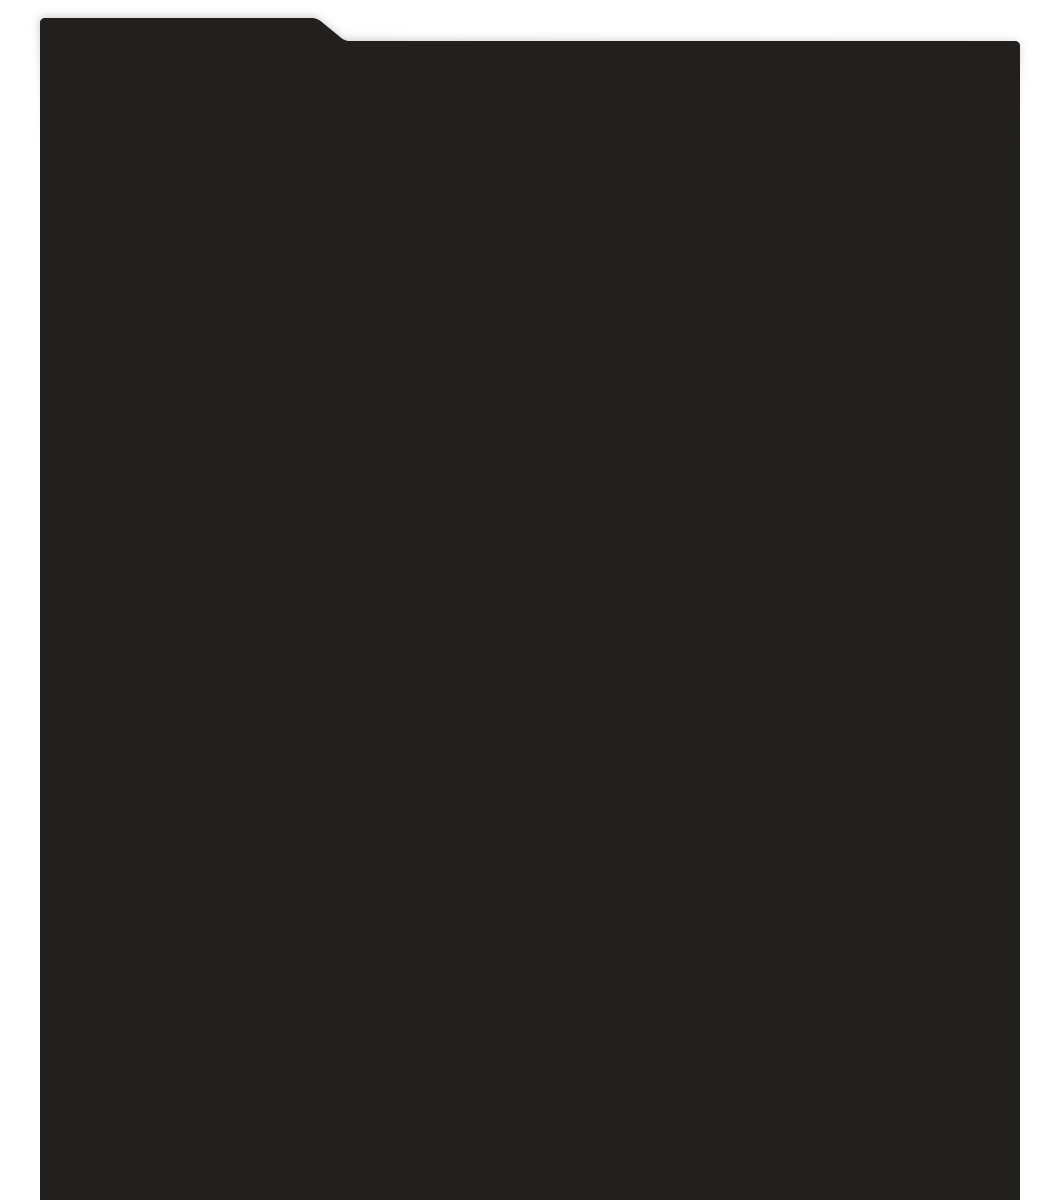
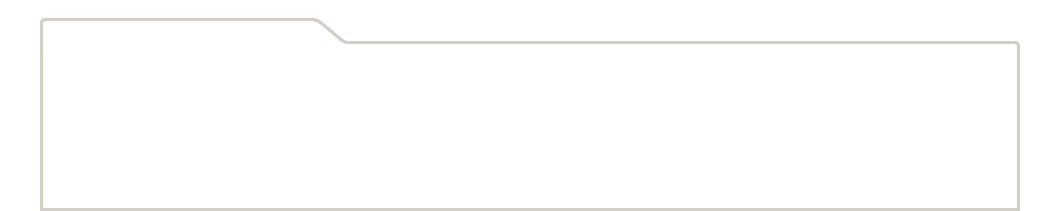
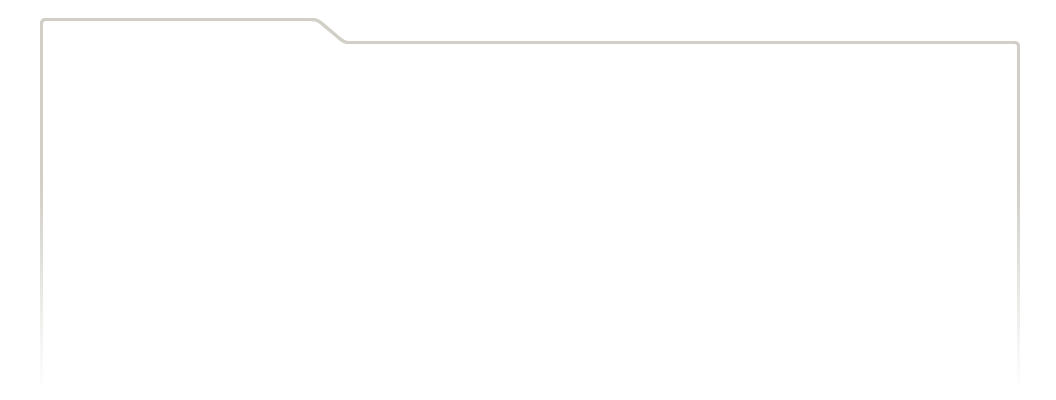
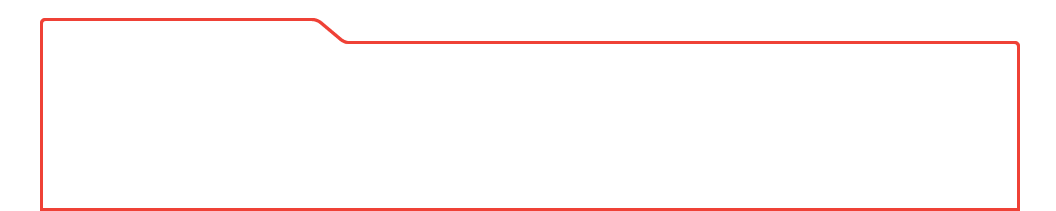
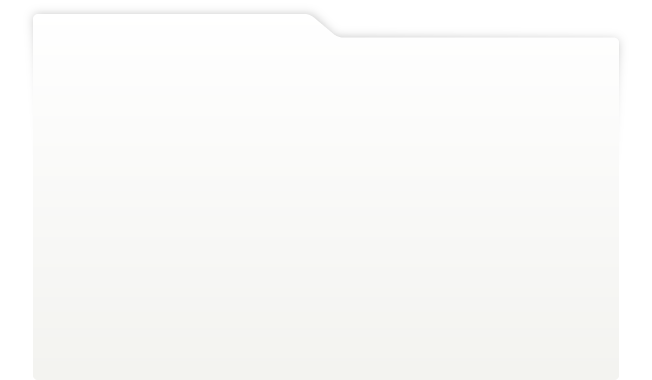
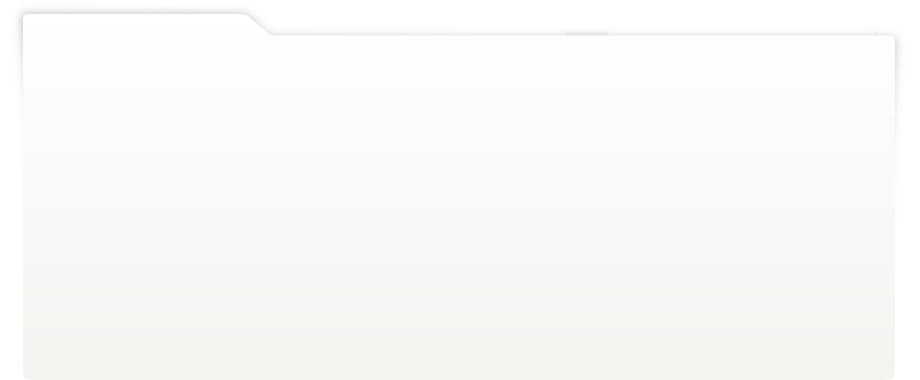
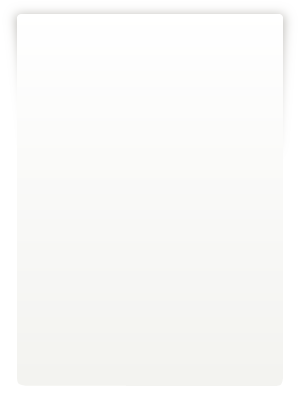
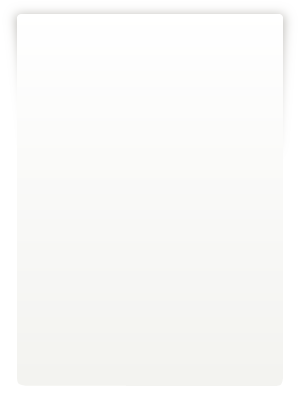
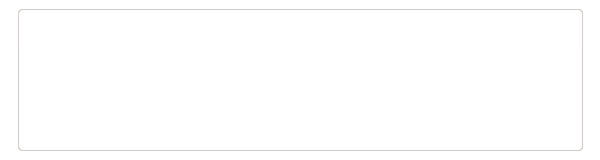
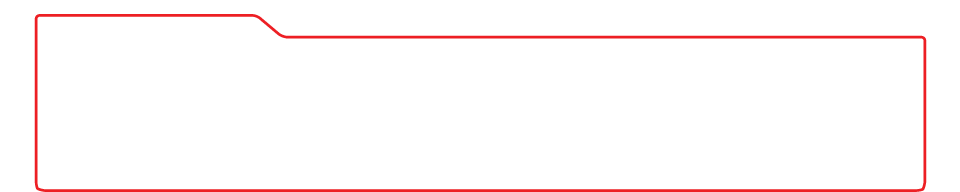
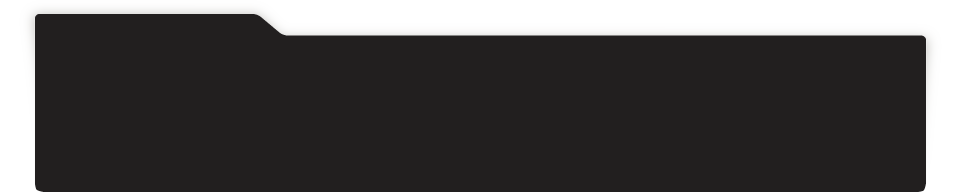
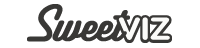
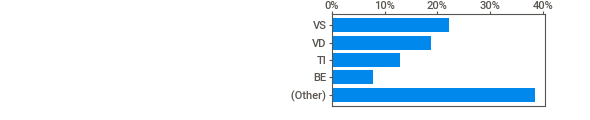
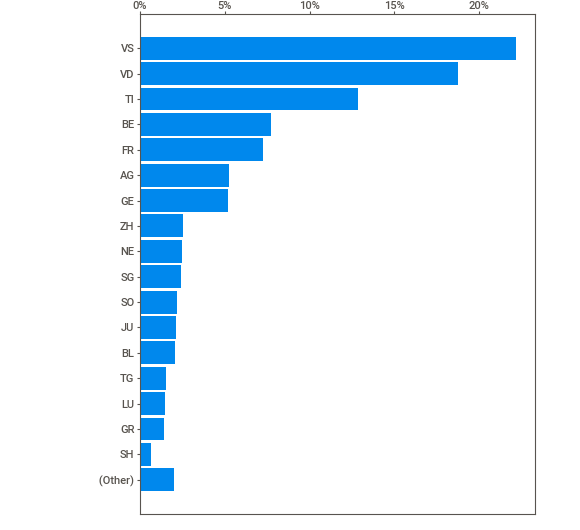
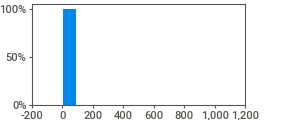
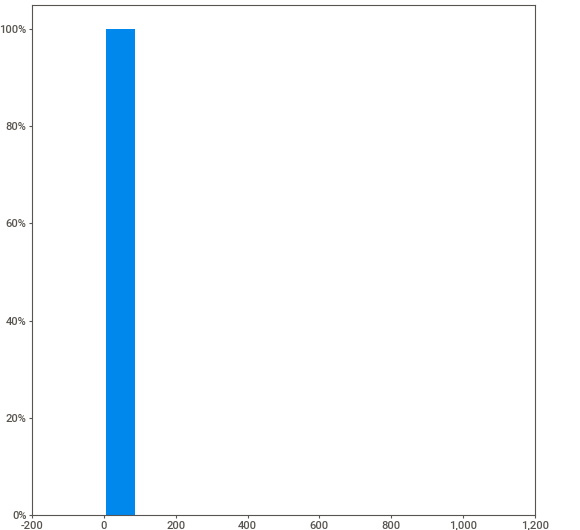
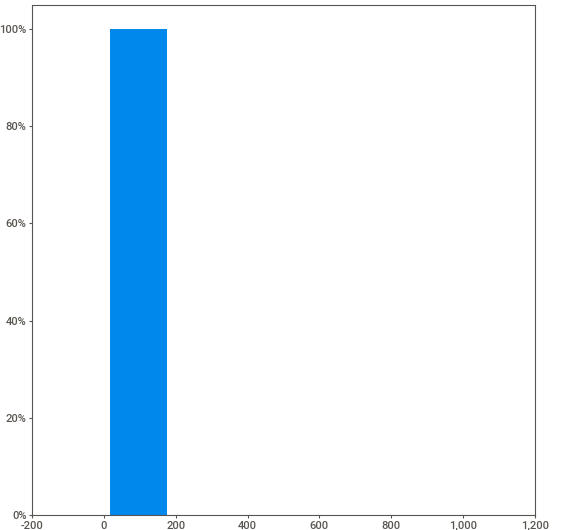
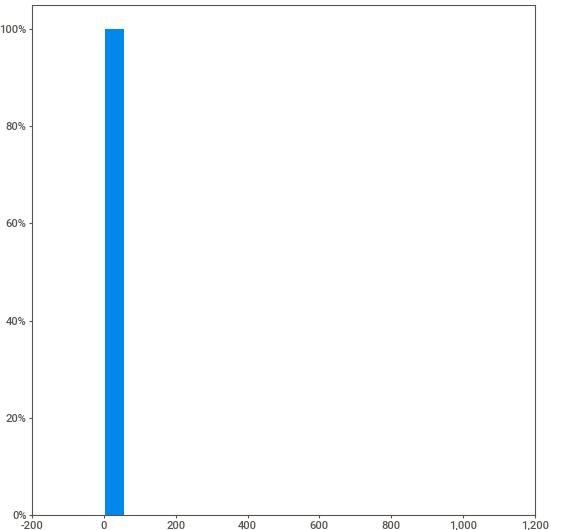
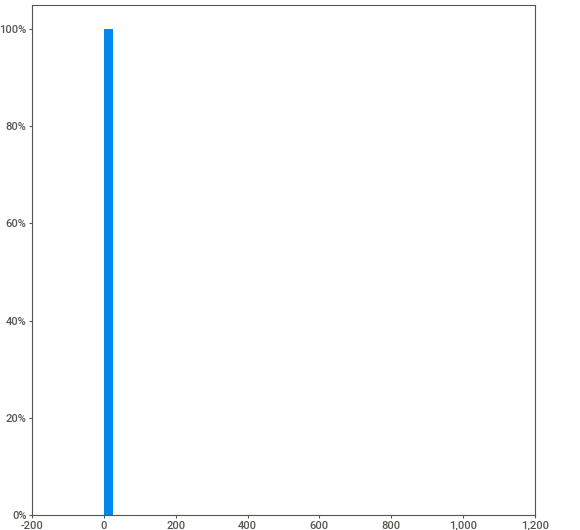
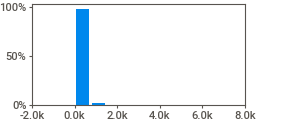
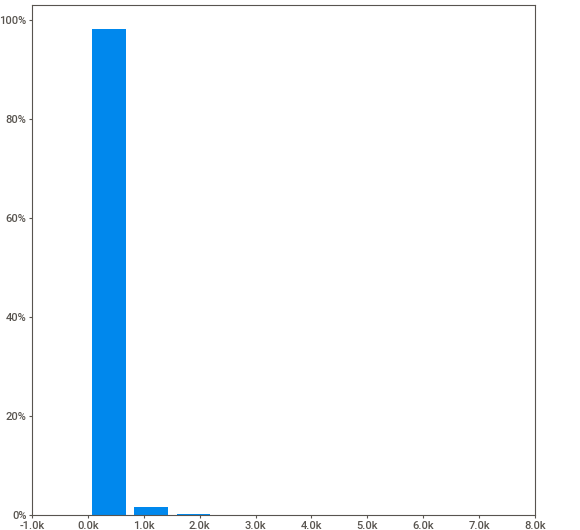
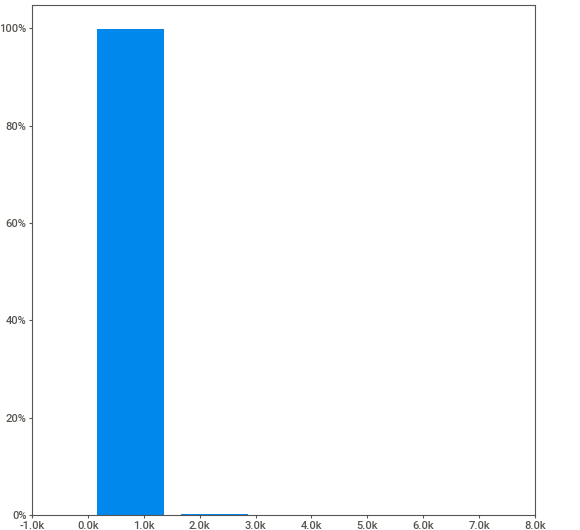
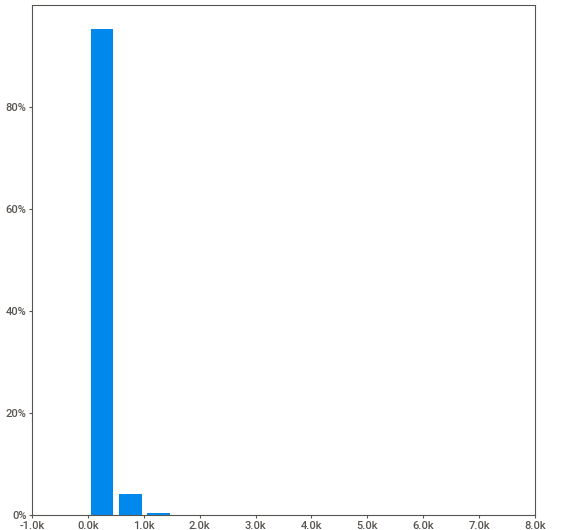
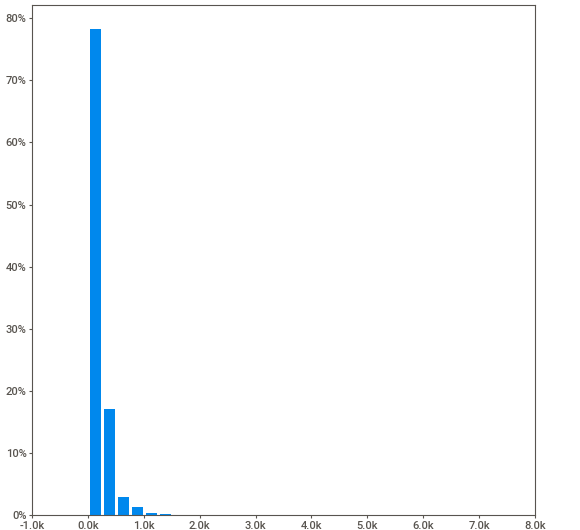
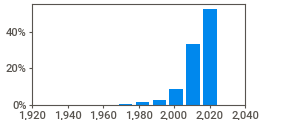
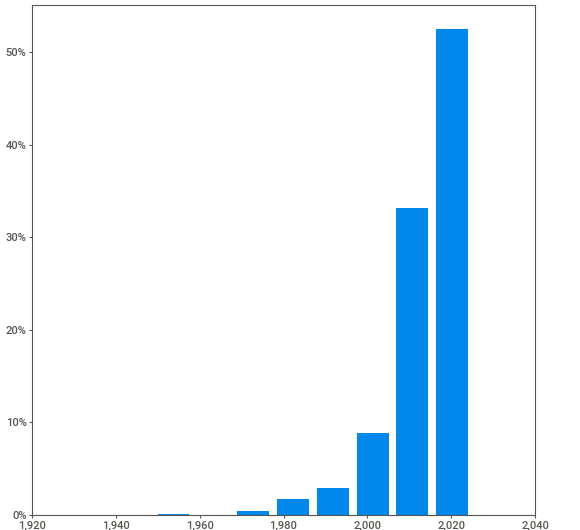
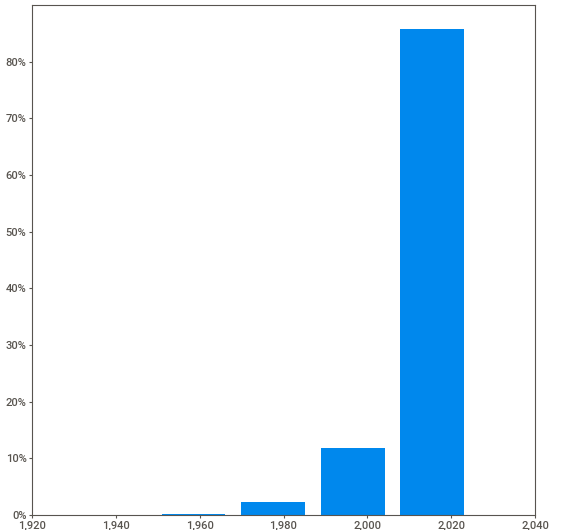
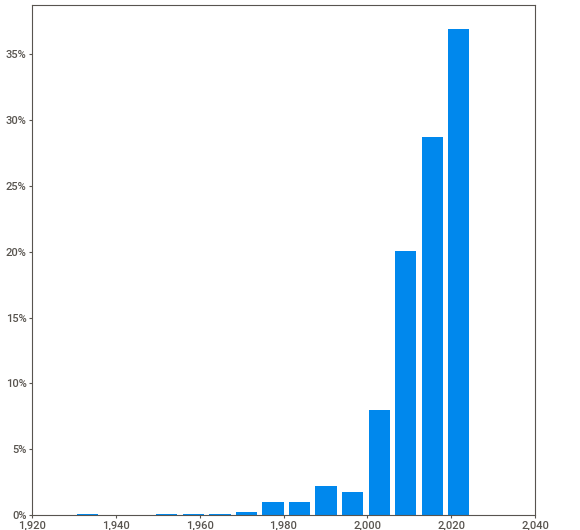
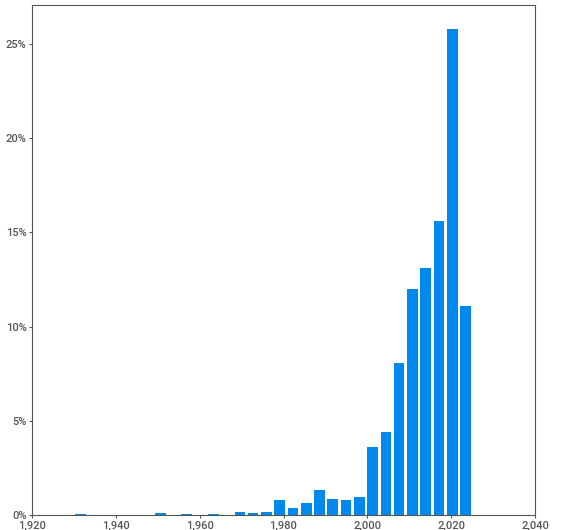
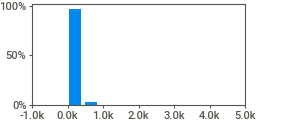
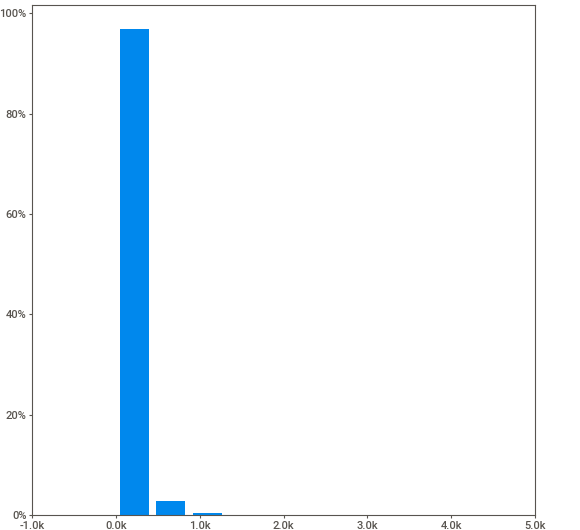
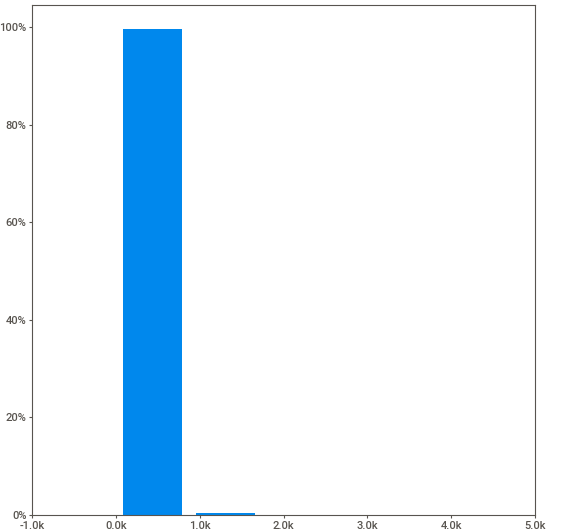
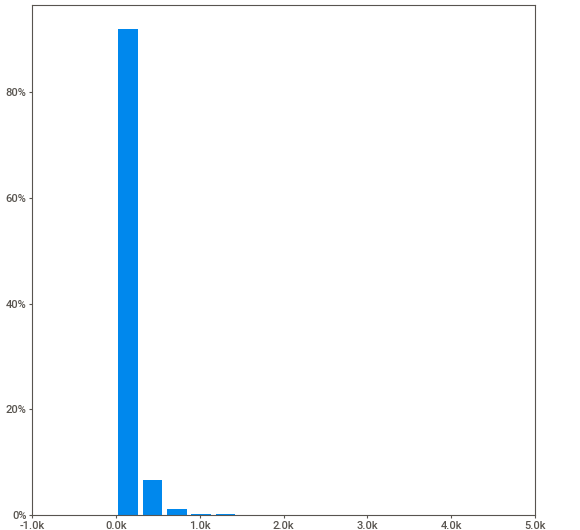
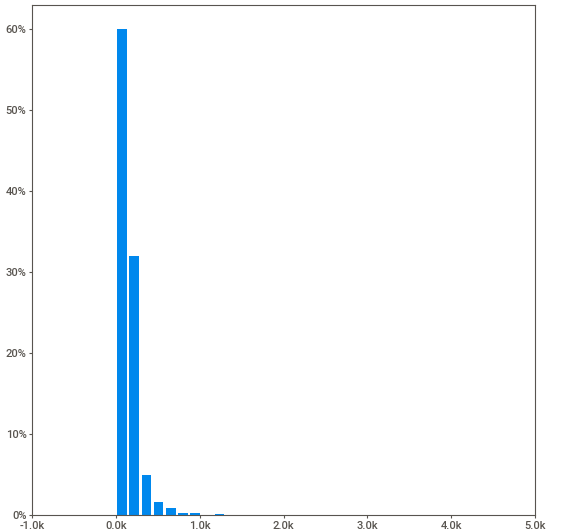
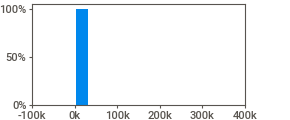
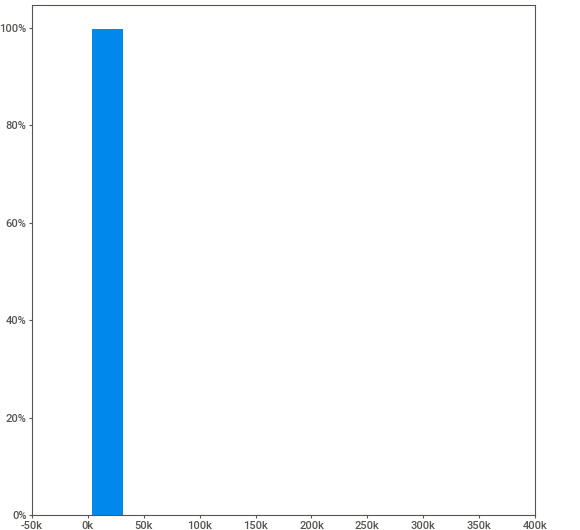
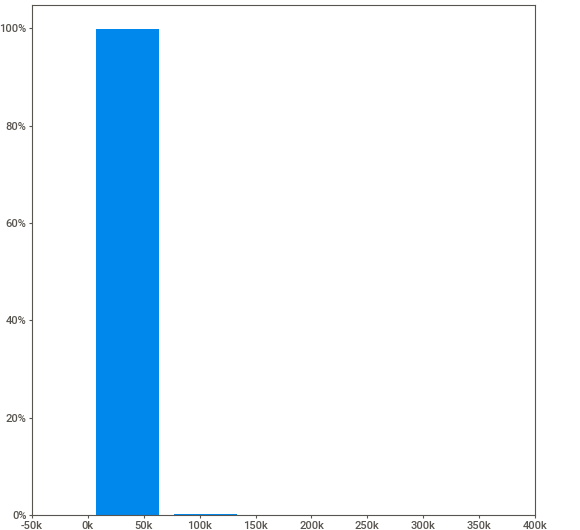
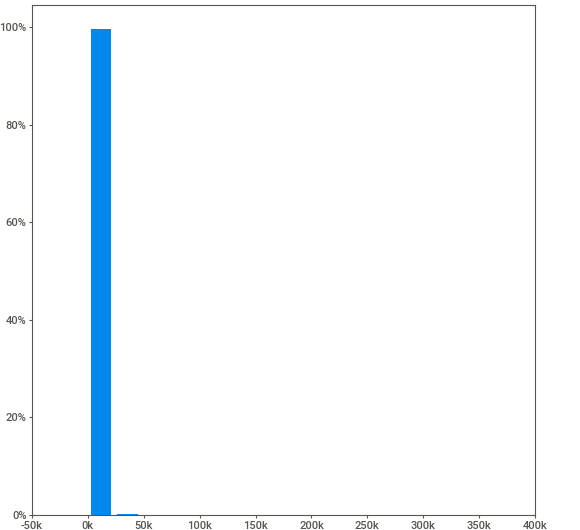
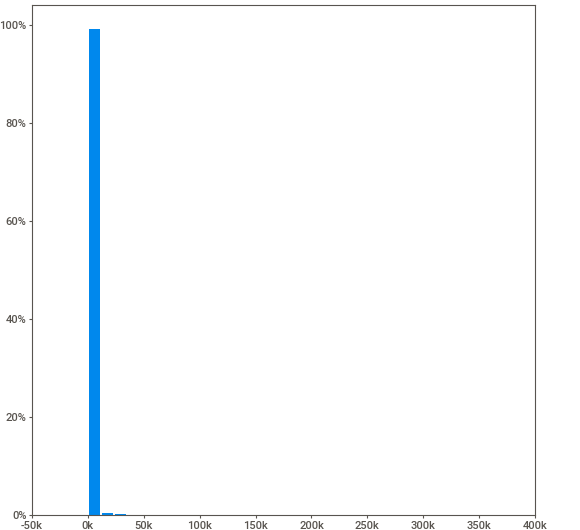
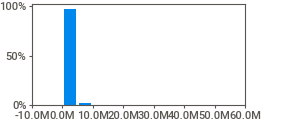
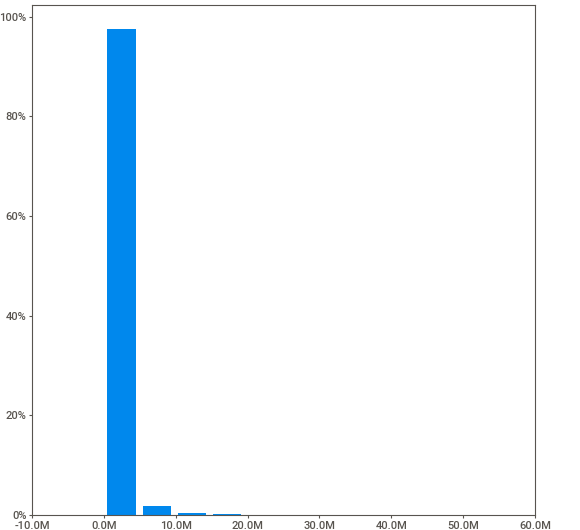
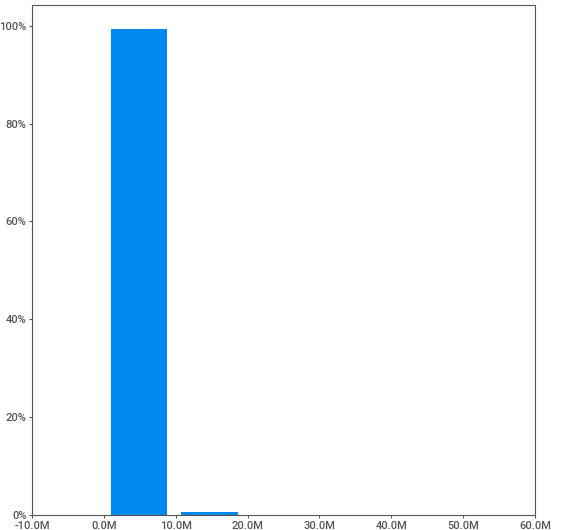
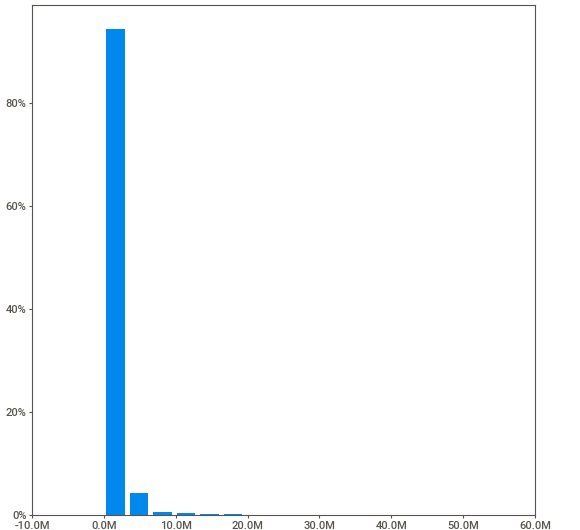
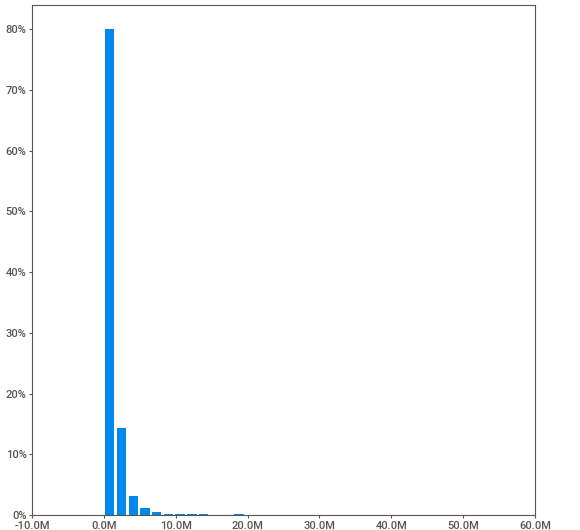
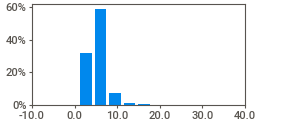
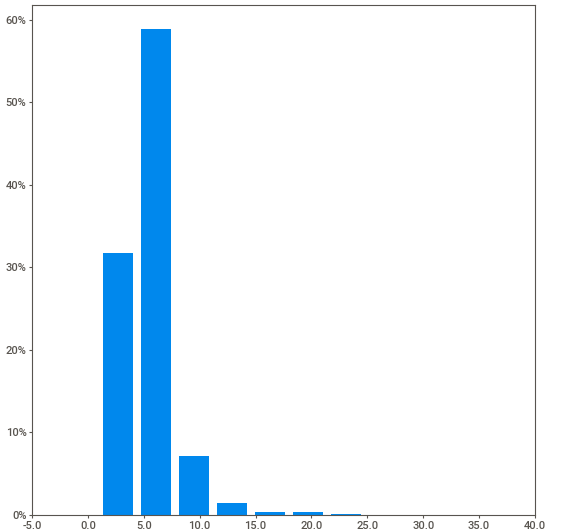
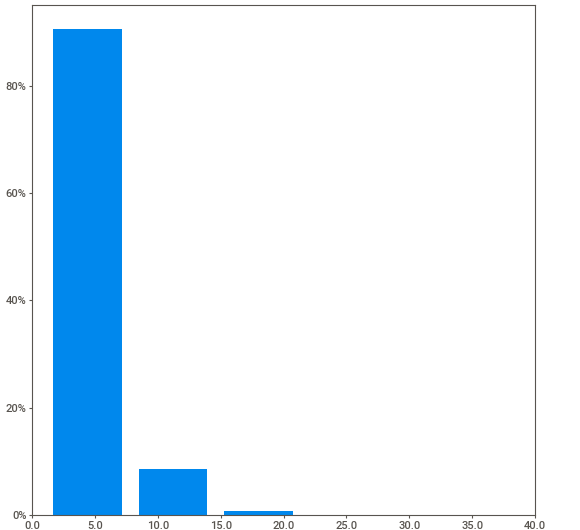
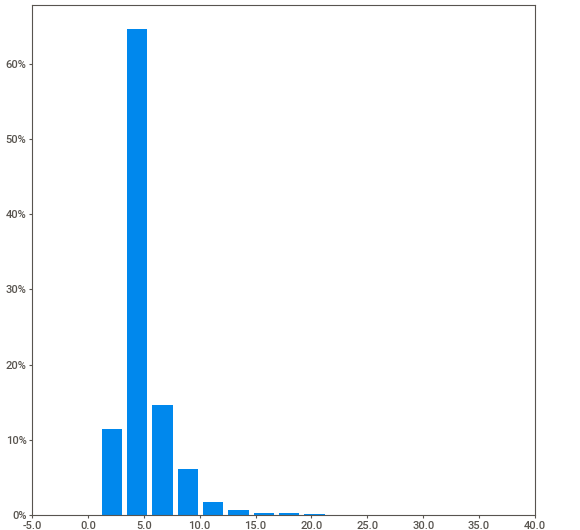
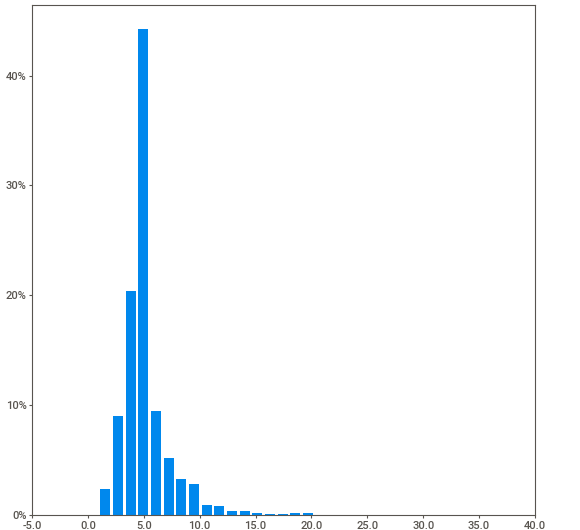
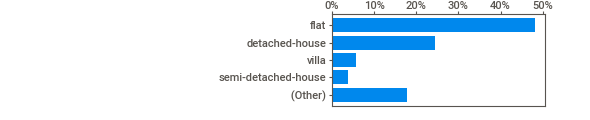
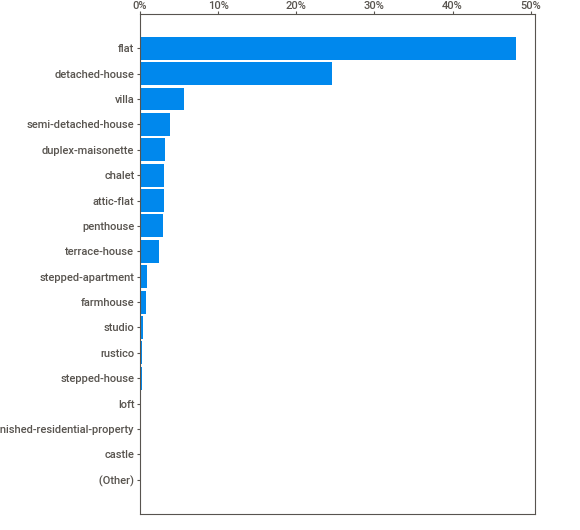
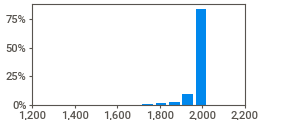
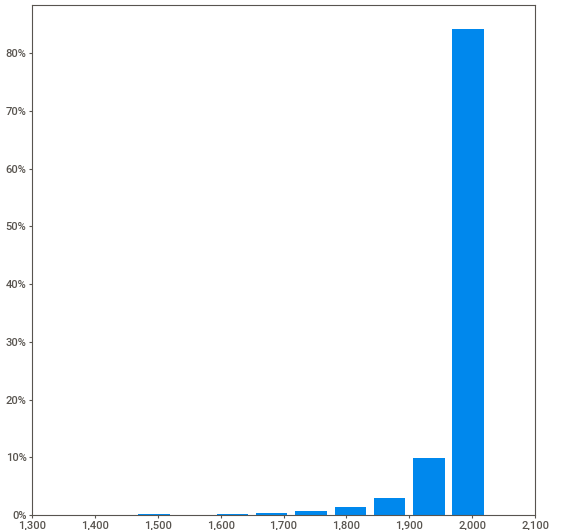
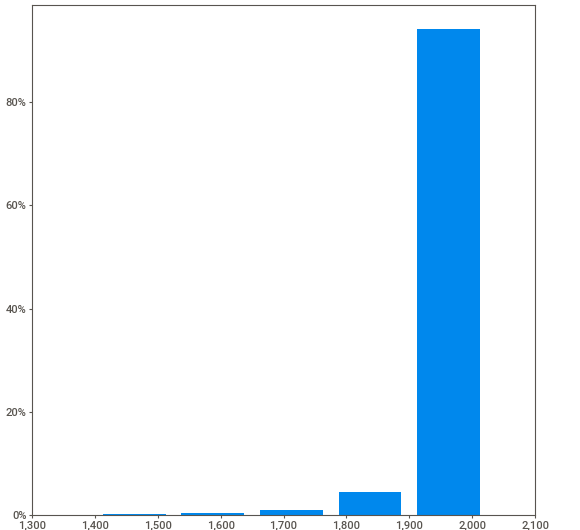
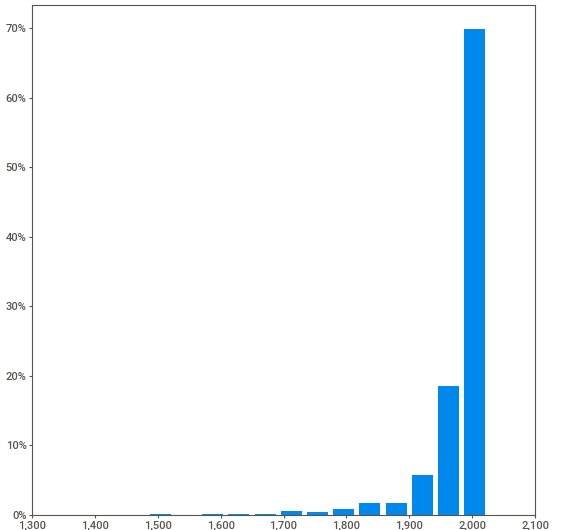
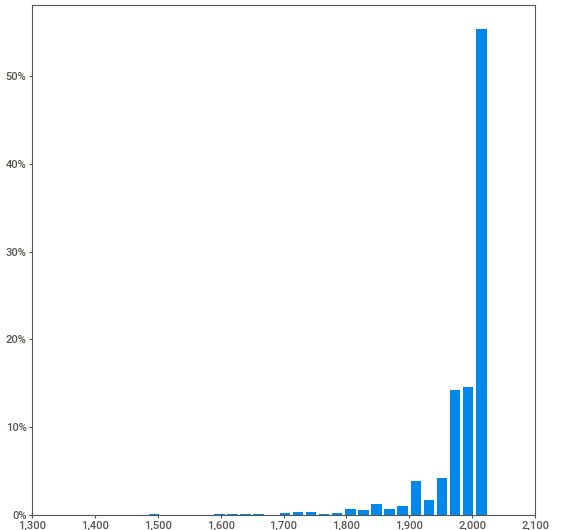
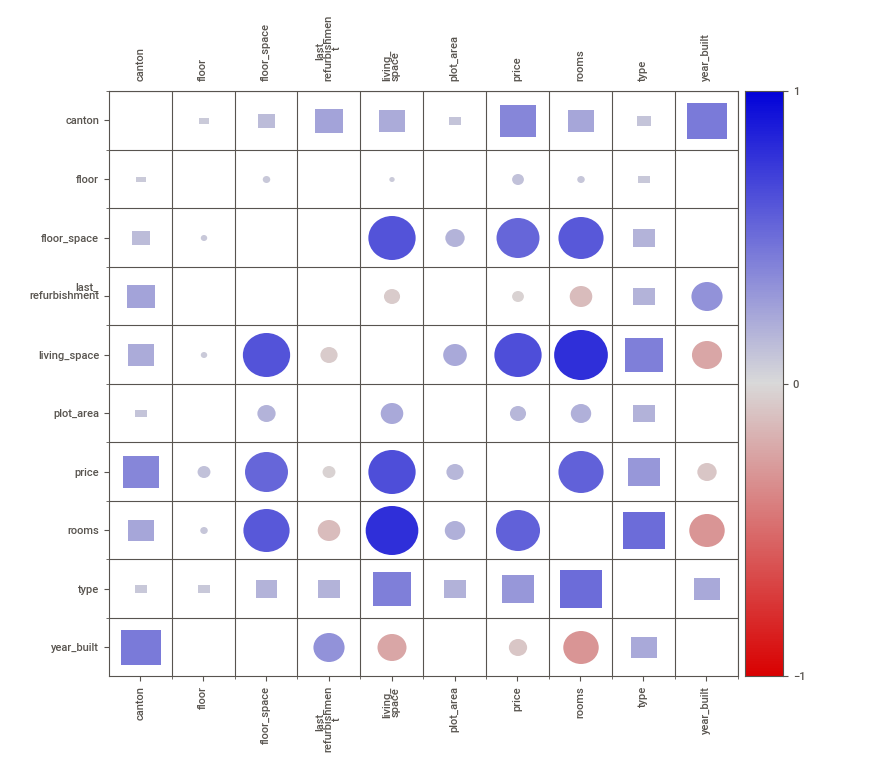
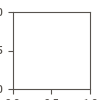

In [4]:
# reorder columns alphabetically and show sweetviz report
df = df.reindex(sorted(df.columns), axis=1)
sweet_report = sv.analyze(df)
sweet_report.show_notebook()

In [5]:
df.shape

(22481, 16)

In [6]:
def clean_rows(df_rows):
    # remove french entry
    df_rows = df_rows[df_rows['zip_code'] != 4160]
    # remove outliers
    df_rows = df_rows[df_rows['price'].fillna(0) > 30000]
    df_rows = df_rows[df_rows['plot_area'].fillna(0) < 247330]
    df_rows = df_rows[df_rows['living_space'].fillna(0) < 1450]
    df_rows = df_rows[df_rows['floor'].fillna(0) <= 100]
    return df_rows

In [7]:
df = clean_rows(df)
df.shape

(21413, 16)

In [8]:
df.to_csv('../../data/clean_v2.csv')

In [9]:
df = helper.process_data(return_gde=True)

In [10]:
df = clean_rows(df)
df.to_csv('../../data/clean_gde_v2.csv')